# Подключение библиотек

In [2]:
import numpy as np # линейная алгебра, матрицы
import pandas as pd # предобработка данных, работа с таблицами
import seaborn as sns # визуализация
import matplotlib.pyplot as plt # визуализация
import statsmodels.api as sm


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro #нормальность тест Шапиро
from sklearn.linear_model import LinearRegression
from scipy.stats import ks_2samp # тест Колмогорова-Смирнова
from sklearn.inspection import permutation_importance # интерпретация модели
from sklearn.model_selection import train_test_split, GridSearchCV # разбивка обучающей выборки и сетка гиперпараметров
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score # метрики

In [3]:
data = pd.read_csv(r'/Users/allastepannikova/Downloads/Wildberries.csv', sep=";")
data

,id,data,balance,sales,rating,price,final_price,is_new,comments,discount,basic_sale,basic_price,prom_sale,client_sale,client_price,categories_cnt,visibility,position
0,105460814,01.09.2022,0,0,0,0.0,0.0,False,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,91264754,01.09.2022,0,0,5,999.0,699.0,False,1,30.0,30.0,699.0,NaN,0.0,699.0,0.0,0.0,0.0
2,115919463,01.09.2022,121,1,5,4900.0,980.0,False,4,80.0,80.0,980.0,NaN,0.0,980.0,2.0,37.0,56.0
3,49387255,01.09.2022,0,0,5,2000.0,1500.0,False,9,25.0,25.0,1500.0,NaN,0.0,1500.0,0.0,63.0,27.0
4,66164479,01.09.2022,7,0,0,995.0,228.0,False,0,77.0,77.0,228.0,NaN,0.0,228.0,4.0,8.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233721,11122968,30.11.2022,2,0,0,3398.0,3398.0,False,0,0.0,0.0,3398.0,NaN,0.0,3398.0,2.0,20.0,59.0
233722,102713567,30.11.2022,58,0,5,870.0,478.0,False,54,45.0,45.0,478.0,NaN,0.0,478.0,0.0,35.0,47.0
233723,113418619,30.11.2022,0,0,5,630.0,163.0,False,8,74.0,74.0,163.0,NaN,0.0,163.0,3.0,1.0,29.0
233724,83254464,30.11.2022,0,0,5,2200.0,462.0,False,160,79.0,79.0,462.0,NaN,0.0,462.0,0.0,0.0,0.0


In [4]:
dataf = data.drop('sales', axis=1)
dataf['sales'] = data.sales

In [5]:
dataf.describe()

,id,balance,rating,price,final_price,comments,discount,basic_sale,basic_price,prom_sale,client_sale,client_price,categories_cnt,visibility,position,sales
count,2.337260e+05,233726.000000,233726.000000,233726.000000,233726.000000,233726.000000,233726.000000,233726.000000,233726.000000,0.0,208837.0,208837.000000,208837.000000,208837.000000,208837.000000,233726.000000
mean,6.181524e+07,24.942497,2.986484,2842.303745,1374.689333,32.927368,40.362929,40.362929,1374.689333,NaN,0.0,1538.523533,2.816278,37.771343,37.633508,0.414425
std,4.031100e+07,190.773270,2.277321,4546.249644,2173.007703,452.296185,26.000708,26.000708,2173.007703,NaN,0.0,2243.359156,3.176535,82.310660,23.905941,2.714978
min,2.108474e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,83.000000,0.000000,0.000000,0.000000,0.000000
25%,2.086982e+07,0.000000,0.000000,590.000000,291.000000,0.000000,22.000000,22.000000,291.000000,NaN,0.0,369.000000,0.000000,2.000000,22.000000,0.000000
50%,6.209540e+07,2.000000,4.000000,1327.000000,648.000000,2.000000,45.000000,45.000000,648.000000,NaN,0.0,764.000000,2.000000,14.000000,42.000000,0.000000
75%,9.643786e+07,12.000000,5.000000,3255.000000,1694.000000,10.000000,60.000000,60.000000,1694.000000,NaN,0.0,1900.000000,4.000000,39.000000,55.000000,0.000000
max,1.449092e+08,11391.000000,5.000000,67038.000000,56982.000000,15071.000000,95.000000,95.000000,56982.000000,NaN,0.0,56982.000000,28.000000,2084.000000,100.000000,187.000000


In [6]:
dataf.head()

,id,data,balance,rating,price,final_price,is_new,comments,discount,basic_sale,basic_price,prom_sale,client_sale,client_price,categories_cnt,visibility,position,sales
0,105460814,01.09.2022,0,0,0.0,0.0,False,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,91264754,01.09.2022,0,5,999.0,699.0,False,1,30.0,30.0,699.0,NaN,0.0,699.0,0.0,0.0,0.0,0
2,115919463,01.09.2022,121,5,4900.0,980.0,False,4,80.0,80.0,980.0,NaN,0.0,980.0,2.0,37.0,56.0,1
3,49387255,01.09.2022,0,5,2000.0,1500.0,False,9,25.0,25.0,1500.0,NaN,0.0,1500.0,0.0,63.0,27.0,0
4,66164479,01.09.2022,7,0,995.0,228.0,False,0,77.0,77.0,228.0,NaN,0.0,228.0,4.0,8.0,66.0,0


In [7]:
pd.isnull(dataf).any()

id                False
data              False
balance           False
rating            False
price             False
final_price       False
is_new            False
comments          False
discount          False
basic_sale        False
basic_price       False
prom_sale          True
client_sale        True
client_price       True
categories_cnt     True
visibility         True
position           True
sales             False
dtype: bool

In [9]:
dataf=dataf.drop('prom_sale',axis=1)
dataf=dataf.dropna()
dataf = dataf[dataf.sales != 0]

KeyError: "['prom_sale'] not found in axis"

In [10]:
dataf=dataf.drop(['client_sale','is_new','id'],axis=1)

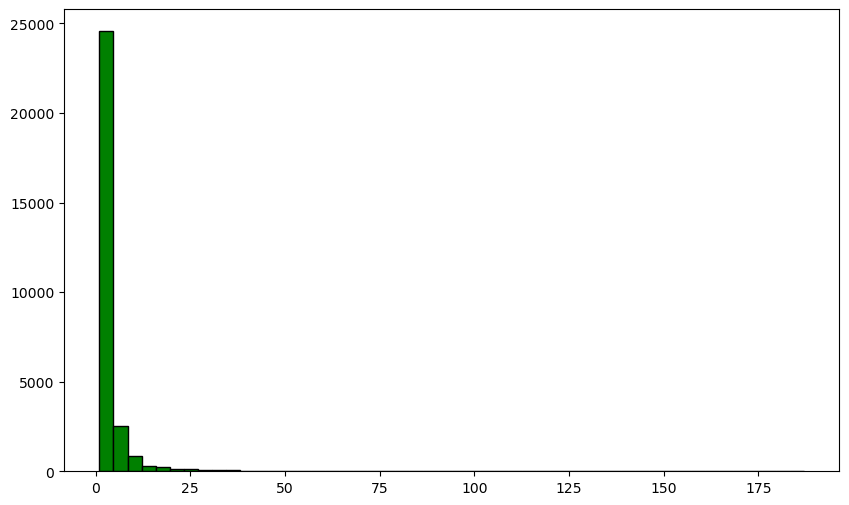

In [11]:
plt.figure(figsize=(10, 6))
tg = np.array(dataf['sales'].astype(float))
plt.hist(dataf['sales'], bins=50, ec='black', color='green')
plt.show()

In [12]:
dataf.sales.describe()

count    29159.000000
mean         3.321856
std          7.030434
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        187.000000
Name: sales, dtype: float64

In [13]:
shapiro(dataf['sales'])

/usr/local/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.32120978832244873, pvalue=0.0)

In [14]:
dataf=dataf.drop('data',axis=1)
dataf.corr()

,balance,rating,price,final_price,comments,discount,basic_sale,basic_price,client_price,categories_cnt,visibility,position,sales
balance,1.000000,0.042520,-0.033530,-0.061579,0.074959,-0.017749,-0.017749,-0.061579,-0.061579,0.039140,0.154764,-0.112290,0.553575
rating,0.042520,1.000000,-0.007188,-0.021890,0.062131,0.033801,0.033801,-0.021890,-0.021890,0.115870,0.203261,-0.090315,0.091431
price,-0.033530,-0.007188,1.000000,0.700928,0.065856,0.264893,0.264893,0.700928,0.700928,0.099159,0.305585,0.044013,0.048918
final_price,-0.061579,-0.021890,0.700928,1.000000,0.009457,-0.146347,-0.146347,1.000000,1.000000,0.169626,0.252178,0.044001,-0.061109
comments,0.074959,0.062131,0.065856,0.009457,1.000000,0.052073,0.052073,0.009457,0.009457,0.010615,0.212178,0.010408,0.178942
discount,-0.017749,0.033801,0.264893,-0.146347,0.052073,1.000000,1.000000,-0.146347,-0.146347,0.032062,0.124993,-0.020217,0.137377
basic_sale,-0.017749,0.033801,0.264893,-0.146347,0.052073,1.000000,1.000000,-0.146347,-0.146347,0.032062,0.124993,-0.020217,0.137377
basic_price,-0.061579,-0.021890,0.700928,1.000000,0.009457,-0.146347,-0.146347,1.000000,1.000000,0.169626,0.252178,0.044001,-0.061109
client_price,-0.061579,-0.021890,0.700928,1.000000,0.009457,-0.146347,-0.146347,1.000000,1.000000,0.169626,0.252178,0.044001,-0.061109
categories_cnt,0.039140,0.115870,0.099159,0.169626,0.010615,0.032062,0.032062,0.169626,0.169626,1.000000,0.340181,0.164827,0.059445


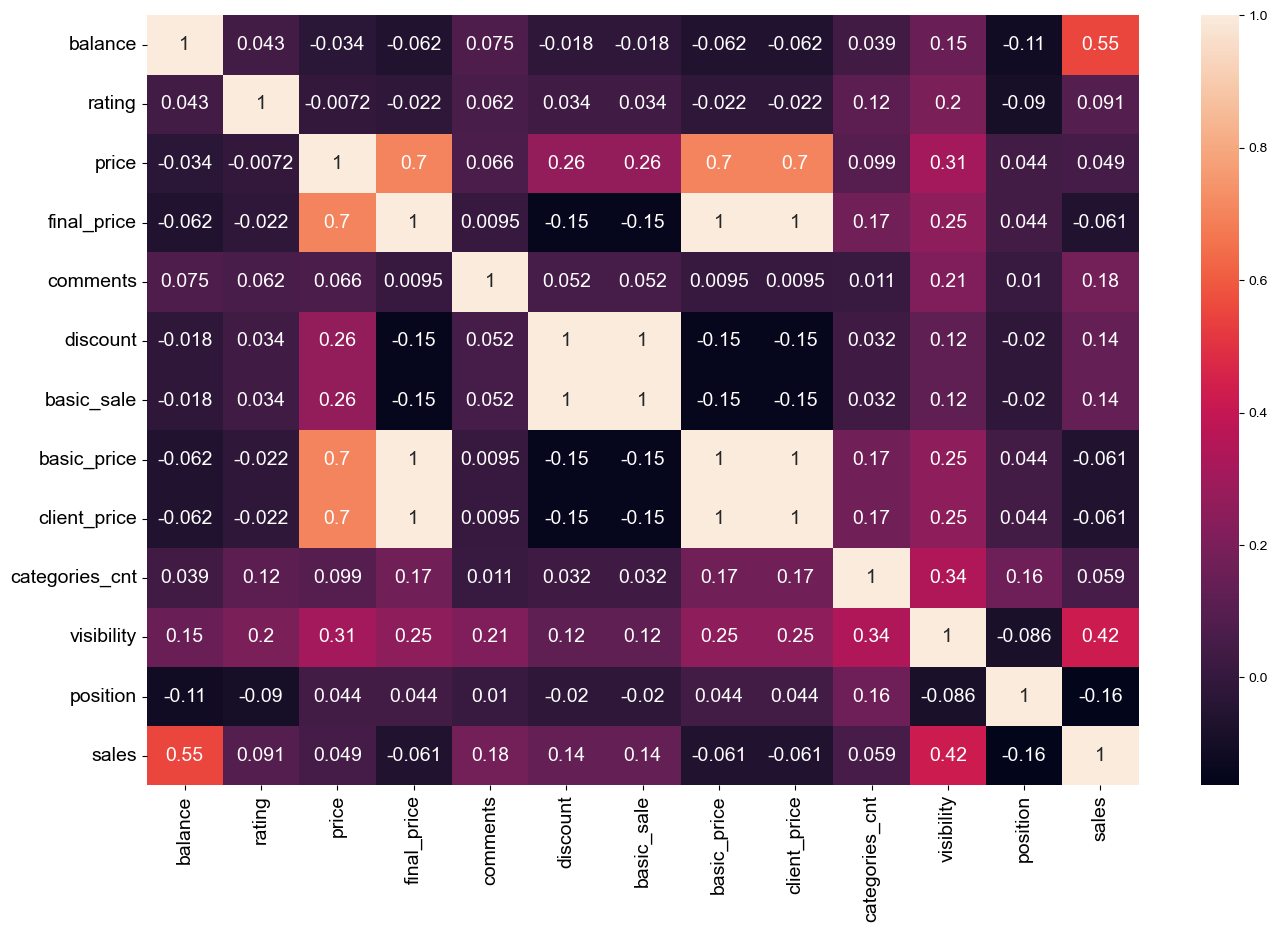

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(dataf.corr(), annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

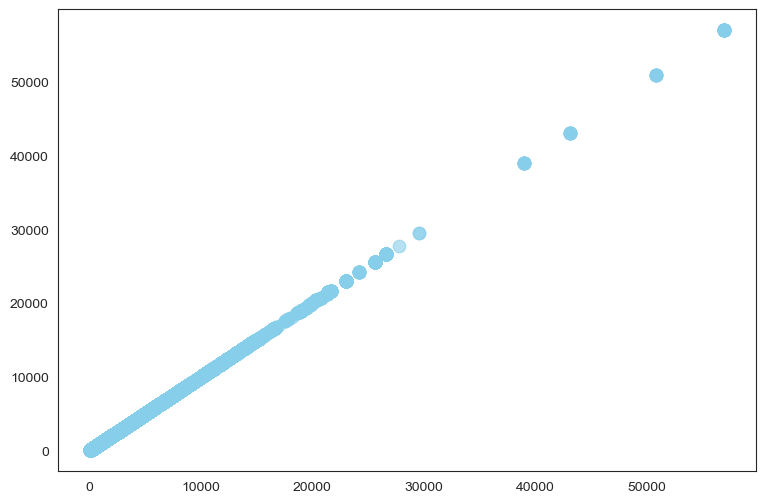

In [125]:
plt.figure(figsize=(9, 6))
plt.scatter(x=dataf['client_price'], y=dataf['final_price'], alpha=0.6, s=80, color='skyblue')
plt.show()

In [16]:
sales = dataf['sales']
features=dataf.drop(['sales','price','basic_price','client_price'], axis=1)
dataf = dataf.drop('basic_sale', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, sales, test_size=0.2, random_state=10)

In [34]:
features=dataf.drop(['sales','price','basic_price','client_price','rating'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, sales, test_size=0.2, random_state=10)

In [35]:
features

,balance,final_price,comments,discount,categories_cnt,visibility,position
2,121,980.0,4,80.0,2.0,37.0,56.0
11,11,187.0,21,75.0,5.0,69.0,43.0
16,569,677.0,1054,95.0,2.0,808.0,32.0
18,33,157.0,3,55.0,2.0,9.0,72.0
20,78,180.0,10,10.0,2.0,52.0,46.0
...,...,...,...,...,...,...,...
233694,1130,539.0,80,63.0,6.0,132.0,35.0
233702,56,917.0,20,72.0,4.0,11.0,44.0
233708,2,280.0,20,15.0,0.0,31.0,31.0
233712,215,2999.0,6,0.0,6.0,266.0,32.0


In [36]:
regres = LinearRegression()
regres.fit(x_train, y_train)

print('Train r-squared:', regres.score(x_train, y_train))
print('Test r-squared:', regres.score(x_test, y_test))
print('B0:', regres.intercept_)
pd.DataFrame(data=regres.coef_, index=x_train.columns, columns=['coef'])

Train r-squared: 0.4604136382932781
Test r-squared: 0.42581066658369005
B0: 1.4074245251720015


,coef
balance,0.006853
final_price,-0.000438
comments,0.000689
discount,0.028669
categories_cnt,-0.098288
visibility,0.014788
position,-0.029717


In [37]:
x_const=sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
res = model.fit()

pd.DataFrame({'coef':res.params, 'p-value': round(res.pvalues, 3)})

,coef,p-value
const,1.407425,0.0
balance,0.006853,0.0
final_price,-0.000438,0.0
comments,0.000689,0.0
discount,0.028669,0.0
categories_cnt,-0.098288,0.0
visibility,0.014788,0.0
position,-0.029717,0.0


In [38]:
vif=[variance_inflation_factor(exog=x_const.values, exog_idx=i) for i in range(x_const.shape[1])]

pd.DataFrame({'coef': x_const.columns, 'vif': np.around(vif, 2)})

,coef,vif
0,const,17.86
1,balance,1.05
2,final_price,1.13
3,comments,1.06
4,discount,1.05
5,categories_cnt,1.19
6,visibility,1.33
7,position,1.07


In [39]:
print('AIC:', res.aic)
print('BIC:', res.bic)
print('R^2:', res.rsquared_adj)

AIC: 143882.04158969814
BIC: 143946.50052383373
R^2: 0.4602516628855873


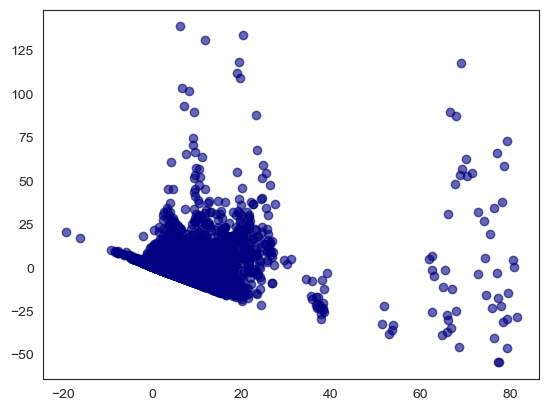

In [40]:
# prices = np.log(dataf['PRICE'])
# features = dataf.drop(['PRICE','AGE','INDUS'], axis=1)

# x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# x_const = sm.add_constant(x_train)
# model = sm.OLS(y_train, x_const)
# res=model.fit()

plt.scatter(x=res.fittedvalues, y=res.resid, c='navy', alpha=0.6)

In [41]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)

lzip(names, test)
# гетероскедастичность присутствует

[('Lagrange multiplier statistic', 1947.9233668702773),
 ('p-value', 0.0),
 ('f-value', 303.525236189227),
 ('f p-value', 0.0)]

/var/folders/d9/bfhvjqps6xdds9gmhtflh16c0000gn/T/ipykernel_4855/745557150.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res.resid, color='navy')


<Axes: ylabel='Density'>

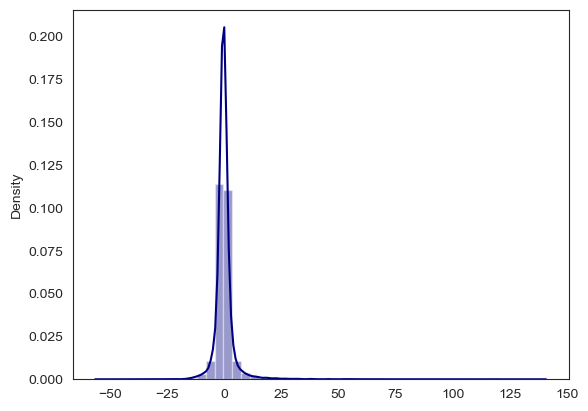

In [42]:
sns.distplot(res.resid, color='navy')

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingRegressor

X_train, X_valid, y_train, y_valid = train_test_split(features, sales, test_size=0.3, random_state=12)
modelReg = BaggingRegressor(estimator=LinearRegression()).fit(X_train,y_train)
print(modelReg.score(X_valid, y_valid))

0.48341567512832406
